In [31]:
import pandas_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# packages for linear regression and validation 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
# The output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
# We start by importing the new data set
home_folder = '/Users/anthonymiyoro/Documents/code/DataTho/'

#Read dataset
train_modified = pd.read_csv(home_folder + 'train_modified.csv')
test_modified = pd.read_csv(home_folder + 'test_modified.csv', encoding = "ISO-8859-1")

## Splitting into train and test

To understand how well our model generalizes, we need to split our data into a test and training set. In order to get a true prediction, we can't show our model the test labels. Instead we just ask the model to score based upon the test explanatory variables.
In order to get to this, we split the dataframe into a test and train.


### X_train, y_train, X_test, y_test

However, we additionally need to seperate the explanatory features from our outcome feature.
To do this we need to create four subsets of data:


X_train: the explanatory features to train the algorithm


y_train: the outcome feature associated with the training features - In this case, these are the loan amounts


X_test: the explanatory features to test the algorithm


y_test: the true Y of the target features associated with the testing geatures - again, in this case, these are the loan amounts.

To do this we will use the sklearn model selection function train_test_split. If you look back to the top of this page, we imported this function at the beginning of the notebook.
The names used below (X_train, X_test, y_train, y_test) are the conventions used in industry for train and test data so you will continue to see them repeatedly.

In [33]:
print(train_modified.columns)

Index(['Item_ID', 'Weight', 'Visibility', 'Max_Price',
       'Store_Establishment_Year', 'Item_Store_Sales', 'FatContent_LF',
       'FatContent_Low Fat', 'FatContent_Regular', 'FatContent_low fat',
       'FatContent_reg', 'Category_Baking Goods', 'Category_Breads',
       'Category_Breakfast', 'Category_Canned', 'Category_Dairy',
       'Category_Frozen Foods', 'Category_Fruits and Vegetables',
       'Category_Hard Drinks', 'Category_Health and Hygiene',
       'Category_Household', 'Category_Meat', 'Category_Others',
       'Category_Seafood', 'Category_Snack Foods', 'Category_Soft Drinks',
       'Category_Starchy Foods', 'Store_Size_High', 'Store_Size_Medium',
       'Store_Size_Small', 'Store_Location_Type_Tier 1',
       'Store_Location_Type_Tier 2', 'Store_Location_Type_Tier 3',
       'Store_Type_Grocery Store', 'Store_Type_Supermarket Type1',
       'Store_Type_Supermarket Type2', 'Store_Type_Supermarket Type3',
       'Store_ID_OUT013', 'Store_ID_OUT018', 'Store_ID_OUT019'

### We then remove the Item_ID feature as it does not correlate to Sales

In [34]:
train_modified = train_modified.drop('Item_ID', axis=1)
test_modified = test_modified.drop('Item_ID', axis=1)

In [35]:
train, test = train_test_split(train_modified, test_size=0.2)
len(train)
len(test)

4887

1222

Our scikit learn package requires that the explanatory variables are stored seperately from the outcome variables.

In [36]:
# create a training array = all the features but not the target
# and a training test array = the results of the target variable for the training array
rf_trainY = train_modified['Item_Store_Sales']
rf_trainX = train_modified.drop('Item_Store_Sales', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(rf_trainX, rf_trainY, test_size=0.2, random_state=42)

len(X_train)
len(X_test)
len(y_train)
len(y_test)

4887

1222

4887

1222

## Decision Tree

Before we get into some of the more sophisticated models, let's first try an individual Decision Tree and see how it performs. 

After training the model, we will be able to assess it's performance by using sklearns useful method .score, which calculates the r2 value for the data provided. 

We will first print out the r2 score for the training data, and then will print out the r2 score for the test data.

In [38]:
from sklearn.tree import DecisionTreeRegressor
# Step 1: Initiating the DecisionTreeRegressor algorithm
decision_regressor = DecisionTreeRegressor(random_state=0)
# Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
decision_regressor.fit(X_train, y_train)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
dt_training_score = decision_regressor.score(X_train, y_train)
dt_testing_score = decision_regressor.score(X_test, y_test)
print("Train score: " + str(dt_training_score))
print("Test score: " + str(dt_testing_score))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Train score: 1.0
Test score: 0.09360946222625643


#### Exporting Model

In [39]:
# save the model to disk
filename = 'decision_tree.sav'
joblib.dump(decision_regressor, filename)

['decision_tree.sav']

From the scores above (the R^2 of the regression between true and predicted loan amounts), we can see that the decision tree works very well on the training dataset, as expected. However, when applied to the testing dataset, it performs much worse.


The R^2 number above are pretty telling but it is always nice to visualise how these look in a scattor plot. This allows us to visualise the variation between the predicted loan amount and the true loan amount values.

### Plotting a graph of the true values vs the predicted values for the training and test datasets

Text(0.5, 0, 'True value')

Text(0, 0.5, 'Predicted value')

Text(0.5, 1.0, 'relationship between True Y and predicted Y* loan amount (training dataset)')

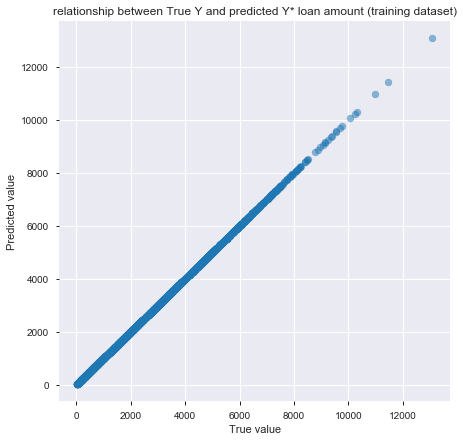

In [40]:
dt_y_predicted_train = decision_regressor.predict(X_train)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_train, dt_y_predicted_train, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* loan amount (training dataset)")
plt.show()

### Plotting a graph of the true values vs the predicted values for the training and test datasets

Text(0.5, 0, 'True value')

Text(0, 0.5, 'Predicted value')

Text(0.5, 1.0, 'relationship between True Y and predicted Y* loan amount (test dataset)')

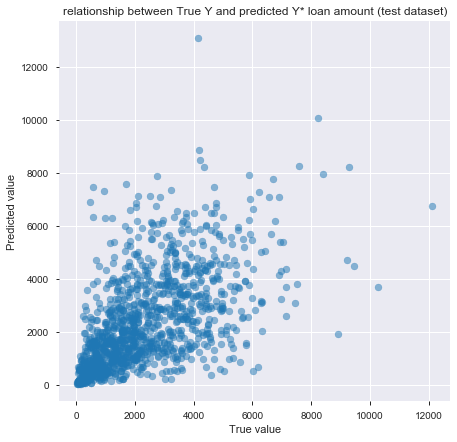

In [41]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
dt_y_predicted_test = decision_regressor.predict(X_test)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_test, dt_y_predicted_test, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* loan amount (test dataset)")
plt.show()

## Random Forest

We can use a Random Forest Regressor, which only considers a random subsample of the features at each split.

### Since we will evaluate a few models, let's define a function that prints out the scores we care about

In [42]:
def print_scores(regressor, X_train, y_train, X_test, y_test, oob_score=True):
    print("Train score: " + str(regressor.score(X_train, y_train)))
    print("Test score: " + str(regressor.score(X_test, y_test)))
    print("OOB score: " + str(regressor.oob_score_))

In [43]:
# Step 1: Initiating the bagging regressor algorithm
rf_regressor = RandomForestRegressor(n_estimators=100, oob_score=True)
# Step 2: Training the bagging regressor algorithm
rf_regressor.fit(X_train,y_train)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
print_scores(rf_regressor, X_train, y_train, X_test, y_test, oob_score=True)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

Train score: 0.9374597894061638
Test score: 0.5291746134965263
OOB score: 0.5522244777145839


Mean squared error between the predicted and true loan amounts: 191749 
Correlation between the predicted and true loan amounts: 0 


Text(0.5, 0, 'True value')

Text(0, 0.5, 'Predicted value')

Text(0.5, 1.0, 'relationship between True Y and predicted Y* loan amount (train dataset)')

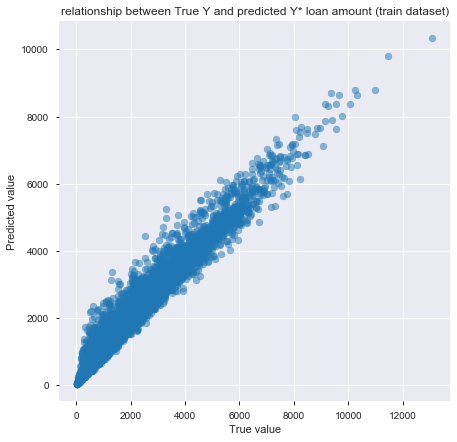

In [44]:
rf_y_predicted_train = rf_regressor.predict(X_train)

print("Mean squared error between the predicted and true loan amounts: %d " % round(mean_squared_error(y_train, rf_y_predicted_train)))
print("Correlation between the predicted and true loan amounts: %d " % r2_score(y_train, rf_y_predicted_train))

fig = plt.figure(figsize=(7, 7))
plt.scatter(y_train, rf_y_predicted_train, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* loan amount (train dataset)")
plt.show()

Mean squared error between the predicted and true loan amounts: 1365351 


Text(0.5, 0, 'True value')

Text(0, 0.5, 'Predicted value')

Text(0.5, 1.0, 'relationship between True Y and predicted Y* loan amount (test dataset)')

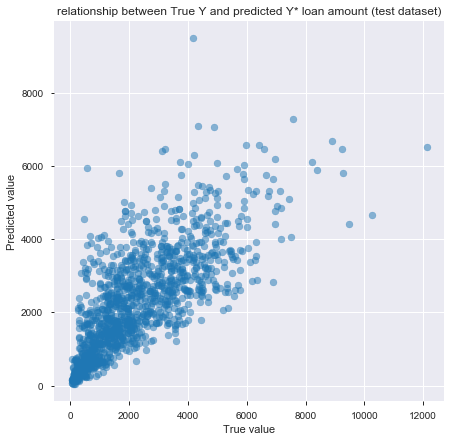

In [45]:
rf_y_predicted_test = rf_regressor.predict(X_test)
print("Mean squared error between the predicted and true loan amounts: %d " % round(mean_squared_error(y_test, rf_y_predicted_test)))

fig = plt.figure(figsize=(7, 7))
plt.scatter(y_test, rf_y_predicted_test, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* loan amount (test dataset)")
plt.show()

### We can use our full dataset for training with a small subset held to the side for each model to compute the OOB score.

In [46]:
# Since we will evaluate a few models, let's define a function that prints out the scores we care about
def print_scores_full(regressor, rf_trainX,rf_trainY , oob_score=True):
    print("Train score: " + str(regressor.score(rf_trainX, rf_trainY)))
    print("OOB score: " + str(regressor.oob_score_))

We also increase the number of estimators in our model to 400 and set the min_samples_leaf to 20 to improve upon overfitting.

In [47]:
# Step 1: Initiating the bagging regressor algorithm
rf_regressor = RandomForestRegressor(n_estimators=400, random_state=42, min_samples_leaf=20,oob_score=True)
# Step 2: Training the bagging regressor algorithm
rf_regressor.fit(rf_trainX,rf_trainY)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
print_scores_full(rf_regressor, rf_trainX,rf_trainY , oob_score=True)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

Train score: 0.6544021100663768
OOB score: 0.5832050004433629


Now, let's try to figure out which features are driving our model's predictions.  
Although we do not have the coefficients provided by a linear regression, we can analyze what percentage of the overall variance was explained by a given feature.

In [48]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

print('Feature Ranking:')
for f in range(len(importances)):
    print("%d. feature %s (%f)" % (f + 1, rf_trainX.columns[indices[f]], importances[indices[f]]))

Feature Ranking:
1. feature Max_Price (0.571094)
2. feature Store_ID_OUT019 (0.097335)
3. feature Store_Type_Grocery Store (0.090903)
4. feature Store_Type_Supermarket Type3 (0.071744)
5. feature Store_ID_OUT027 (0.064822)
6. feature Store_Establishment_Year (0.036058)
7. feature Visibility (0.026553)
8. feature Weight (0.021571)
9. feature Store_Type_Supermarket Type1 (0.002261)
10. feature FatContent_Low Fat (0.002114)
11. feature Store_Location_Type_Tier 3 (0.001836)
12. feature FatContent_Regular (0.001606)
13. feature Store_Size_Small (0.001317)
14. feature Store_Location_Type_Tier 1 (0.001169)
15. feature Store_ID_OUT046 (0.001139)
16. feature Store_ID_OUT018 (0.001120)
17. feature Store_Type_Supermarket Type2 (0.001062)
18. feature Category_Fruits and Vegetables (0.001020)
19. feature Category_Snack Foods (0.000974)
20. feature Category_Household (0.000820)
21. feature Store_Size_Medium (0.000648)
22. feature Store_ID_OUT035 (0.000597)
23. feature Store_Location_Type_Tier 2 (0.0

### We use the top 9 features, perhaps the accuracy will improve ????


In [49]:
relevant_cols = [rf_trainX.columns[indices[f]] for f in range(9)]
X_train2 = rf_trainX[relevant_cols]

In [55]:
# Step 1: Initiating the bagging regressor algorithm
rf_regressor = RandomForestRegressor(n_estimators=600, random_state=42, min_samples_leaf=20,oob_score=True)
# Step 2: Training the bagging regressor algorithm
rf_regressor.fit(X_train2,rf_trainY)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
print_scores_full(rf_regressor, X_train2,rf_trainY, oob_score=True)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

Train score: 0.6509804240137484
OOB score: 0.5818561467503756


### It does not appear to do so.

##  Null Hypothesis: Predicted Values == Actual Values

## Alternative Hypothesis: 

#### Saving Model as .sav

In [51]:
# save the model to disk
filename = 'random_forest.sav'
joblib.dump(rf_regressor, filename)

['random_forest.sav']

In [52]:
####